In [2]:
# Set some parameters
im_width = 256
im_height =256
border = 5

In [3]:
dataset_path =  r'D:/dataset'
files = os.listdir(dataset_path)
print(files)

['BI', 'RES']


In [4]:
def count_images_in_directory(directory):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    image_count = 0

    for root, dirs, files in os.walk(directory):
        for file in files:
            file_extension = os.path.splitext(file)[1].lower()
            if any(file_extension == ext or file_extension == ext.upper() for ext in image_extensions):
                image_count += 1

    return image_count

In [5]:
# Count the total number of images in the dataset
total_images = count_images_in_directory(dataset_path)

print("No. of images = ", total_images)

No. of images =  16800


In [6]:
masks= r'D:/masks'
ms = os.listdir(masks)
print(ms)

['BI', 'RES']


In [7]:
d = glob.glob(os.path.join(dataset_path, '**', '*.[jJp][pPn][gGg]'), recursive=True)
m= glob.glob(os.path.join(masks, '**', '*.jpg'), recursive=True)

In [8]:
X = np.zeros((len(m), im_height, im_width, 3), dtype=np.float32)  # creating two NumPy arrays, X and y
y = np.zeros((len(m), im_height, im_width, 1), dtype=np.float32)  #The shape of the array is determined by (len(ids), im_height, im_width, 1)
len(X)


731

In [9]:
# Arrays to store images and masks

for n, id_ in tqdm_notebook(enumerate(m), total=len(m)):
  #if n==5:
    #break;
  img_path = id_.replace('ISPFDv2 masks', 'ISPFDv2 dataset')
  if os.path.exists(img_path):
      #print(img_path)

      img = load_img(img_path, color_mode="rgb")
      x_img = img_to_array(img)
      x_img = resize(x_img, (256, 256, 3), mode='constant', preserve_range=True)

  else:
      root, ext = img_path.split('.')
      img_upper = root + '.' + f"{ext.upper()}"
      # print(img_upper)
      img = load_img(img_upper, color_mode="rgb")
      x_img = img_to_array(img)
      x_img = resize(x_img, (256, 256, 3), mode='constant', preserve_range=True)

    # Modify mask path to consider the directory structure
  mask_path = os.path.join(dataset_path, id_)

  mask = load_img(mask_path, color_mode="grayscale")
  #mask = load_img(masks +id_, grayscale=True)
  m_mask = img_to_array(mask)
  m_mask = resize(m_mask, (256, 256, 1), mode='constant', preserve_range=True)

  # Save images
  X[n] = x_img / 255.0
  y[n] = m_mask / 255.0
  y[n]= (y[n]>0.01).astype(np.uint8)

  X = np.array(X)
  y = np.array(y)




C:\Users\Pooja\AppData\Local\Temp\ipykernel_10704\101476683.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n, id_ in tqdm_notebook(enumerate(m), total=len(m)):


  0%|          | 0/731 [00:00<?, ?it/s]

In [10]:
print(X.shape)
print(y.shape)

(731, 256, 256, 3)
(731, 256, 256, 1)


In [11]:
    '''
    img = load_img('/content/drive/MyDrive/IIITD masks/Natural/Outdoor/11_o_1_n_3.jpg', color_mode="grayscale")
    x_img = img_to_array(img)
    x_img = resize(x_img, (128, 128, 1), mode = 'constant', preserve_range = True)
    plt.imshow(x_img/255.0, cmap="gray")
    plt.show()
    '''

'\nimg = load_img(\'/content/drive/MyDrive/IIITD masks/Natural/Outdoor/11_o_1_n_3.jpg\', color_mode="grayscale")\nx_img = img_to_array(img)\nx_img = resize(x_img, (128, 128, 1), mode = \'constant\', preserve_range = True)\nplt.imshow(x_img/255.0, cmap="gray")\nplt.show()\n'

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(y_train))
print(len(X_valid))


584
584
147


values: 1.0


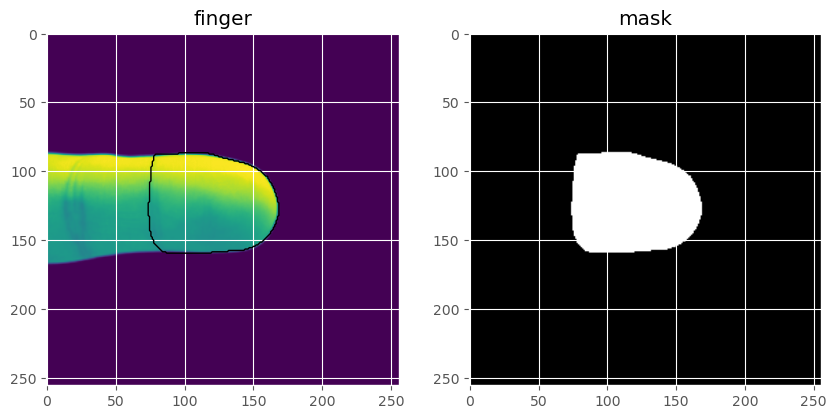

In [13]:
# Visualize any randome image along with the mask
ix = random.randint(0, len(X_train))
#ix=2
has_mask = y_train[ix].max() > 0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.imshow(X_train[ix, ..., 0], cmap = None, interpolation = 'bilinear')
if has_mask:
   ax1.contour((y_train[ix].squeeze()>0.01).astype(np.uint8), colors = 'k', linewidths = 1, levels = [0.5])
ax1.set_title('finger')

ax2.imshow((y_train[ix].squeeze()>0.01).astype(np.uint8), cmap = 'gray', interpolation = 'bilinear')
ax2.set_title('mask')
# print("values:", np.unique(y_train[ix]))
print("values:", np.max(y_train[ix]))

In [14]:
from skimage.util import random_noise



# Add Gaussian noise to test images (X_valid)
for i in range(len(X_valid)):
    X_valid[i] = random_noise(X_valid[i], mode='gaussian', seed=None, clip=True)

# Verify the shape of X_valid after adding noise
print(X_valid.shape)

C:\Users\Pooja\AppData\Local\Temp\ipykernel_10704\1846908341.py:7: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  X_valid[i] = random_noise(X_valid[i], mode='gaussian', seed=None, clip=True)


(147, 256, 256, 3)


(147, 256, 256, 3)


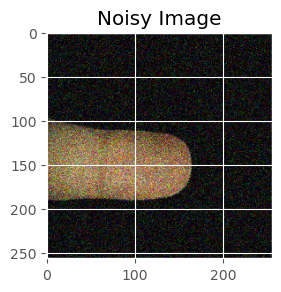

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Create a copy of X_valid to store the noisy images
X_valid_with_noise = np.copy(X_valid)

# Add Gaussian noise to test images (X_valid_with_noise)
for i in range(len(X_valid_with_noise)):
    noise = np.random.normal(loc=0, scale=0.1, size=X_valid_with_noise[i].shape)
    X_valid_with_noise[i] = np.clip(X_valid_with_noise[i] + noise, 0, 1)

# Verify the shape of X_valid_with_noise after adding noise
print(X_valid_with_noise.shape)



plt.subplot(1, 2, 2)
plt.imshow(X_valid_with_noise[0])
plt.title('Noisy Image')
plt.axis('ON')

plt.show()


In [17]:
print("values:", np.unique(y_train))

values: [0. 1.]


In [28]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('D:\models\GNaruv2model.weights.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [29]:
results = model.fit(X_train, y_train, batch_size=16, epochs=100, callbacks=callbacks,\
                    validation_data=(X_valid, y_valid))

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8536 - loss: 0.3890
Epoch 1: val_loss improved from inf to 25.90071, saving model to D:\models\GNaruv2model.weights.h5
37/37 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - accuracy: 0.8558 - loss: 0.3848 - val_accuracy: 0.4081 - val_loss: 25.9007 - learning_rate: 0.0010
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9864 - loss: 0.0789
Epoch 2: val_loss improved from 25.90071 to 1.79123, saving model to D:\models\GNaruv2model.weights.h5
37/37 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.9865 - loss: 0.0787 - val_accuracy: 0.8645 - val_loss: 1.7912 - learning_rate: 0.0010
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9916 - loss: 0.0510
Epoch 3: val_loss improved from 1.79123 to 0.14613, saving model to D:\models\GNaruv2model.weights.h5
37/37 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.9916 - loss: 0.0510 - val_accuracy: 0.9679 - val_loss: 0.1461 - learning_rate: 0.0010
Epoch 4/100
37/37 ━━━━━

In [44]:
model.save(r'D:\full_model2GN.h5')

In [45]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model(r'D:\full_model2GN.h5')

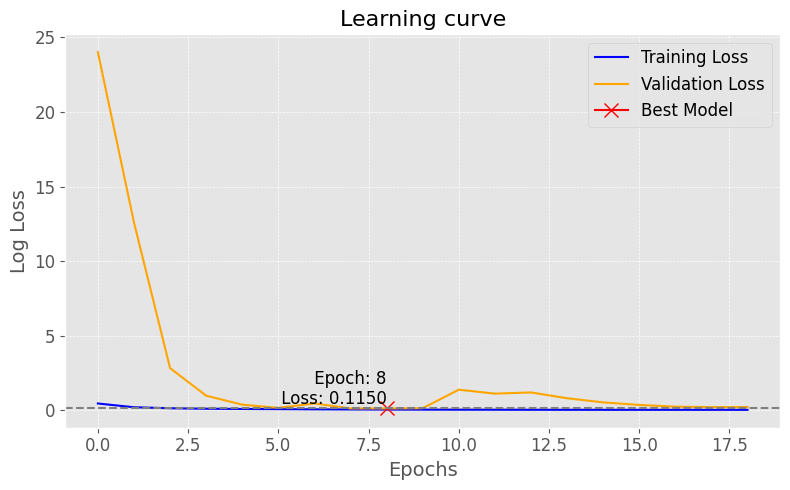

In [29]:
plt.figure(figsize=(8, 5))
plt.title("Learning curve", fontsize=16)
plt.plot(results.history["loss"], label="Training Loss", color="blue")
plt.plot(results.history["val_loss"], label="Validation Loss", color="orange")
best_epoch = np.argmin(results.history["val_loss"])
plt.plot(best_epoch, np.min(results.history["val_loss"]), marker="x", color="red", markersize=10, label="Best Model")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Log Loss", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=np.min(results.history["val_loss"]), color="gray", linestyle="--")
plt.text(best_epoch, np.min(results.history["val_loss"]), f' Epoch: {best_epoch}\n Loss: {np.min(results.history["val_loss"]):.4f}', fontsize=12, ha='right', va='bottom')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [30]:
# load the best model
#model.load_weights('/content/drive/MyDrive/model.h5')
model.load_weights('model.h5')


In [31]:
#import tensorflow as tf
#model = tf.keras.models.load_model('/content/drive/MyDrive/model.h5')

In [47]:
# Evaluate on test set
model.evaluate(X_valid, y_valid, verbose=1) 


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9200 - loss: 0.3784


[0.38197919726371765, 0.91898113489151]

In [58]:
model.evaluate(X_valid_with_noise, y_valid, verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9149 - loss: 0.4038


[0.4095095098018646, 0.9135504364967346]

In [ ]:
X_valid=X_valid_with_noise

In [49]:
# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_valid, verbose=1)
print("Raw Predictions:", preds_train.min(), preds_train.max())

19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
Raw Predictions: 9.216758e-05 1.0


In [51]:
#print(iou)

In [52]:
# Threshold predictions

threshold=0.5
preds_train_t =(preds_train > threshold).astype(np.uint8)
preds_val_t =(preds_val > threshold).astype(np.uint8)
print(preds_train_t.shape)
print(preds_val_t.shape)
print("Shape of preds_train_t:", preds_train_t.shape)
print("Unique Values in preds_train_t:", np.unique(preds_train_t))
#print("Thresholded Mask:", preds_train_t[i, ..., 0])

(584, 256, 256, 1)
(147, 256, 256, 1)
Shape of preds_train_t: (584, 256, 256, 1)
Unique Values in preds_train_t: [0 1]


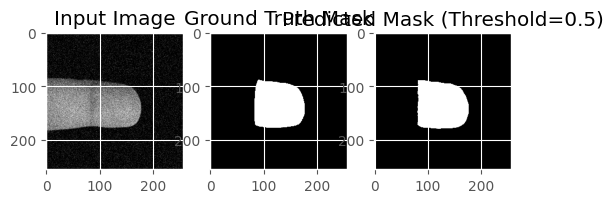

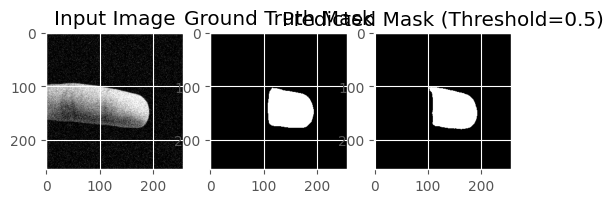

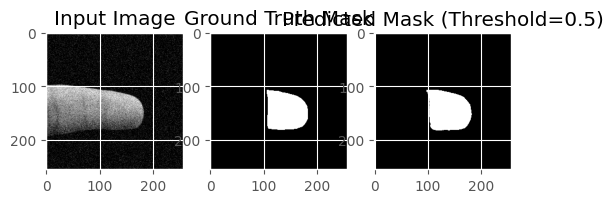

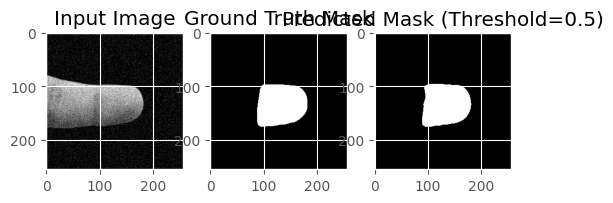

In [38]:
for i in range(4):  # Adjust the range as needed
    plt.figure(figsize=(6, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(X_valid[i, ..., 0], cmap='gray')
    plt.title('Input Image')

    plt.subplot(1, 3, 2)
    plt.imshow(y_valid[i, ..., 0], cmap='gray')
    plt.title('Ground Truth Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(preds_val_t[i, ..., 0], cmap='gray')
    plt.title(f'Predicted Mask (Threshold={threshold})')

    plt.show()


In [56]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Flatten the predictions to 1D array
preds_train_flat = preds_train_t.flatten()
preds_val_flat = preds_val_t.flatten()
# Threshold your continuous ground truth labels
y_train_binary = (y_train >= 0.5).astype(int)
y_val_binary = (y_valid >= 0.5).astype(int)
# Flatten the ground truth labels to 1D array
y_train_binary_flat = y_train_binary.flatten()
y_val_binary_flat = y_val_binary.flatten()

# Calculate precision for the training and test set
precision_train = precision_score(y_train_binary_flat, preds_train_flat)
recall_train = recall_score(y_train_binary_flat, preds_train_flat)
f1_train = f1_score(y_train_binary_flat, preds_train_flat)
print(f"Training set - Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, F1 Score: {f1_train:.4f}")
precision_test = precision_score(y_val_binary_flat, preds_val_flat)
recall_test = recall_score(y_val_binary_flat, preds_val_flat)
f1_test = f1_score(y_val_binary_flat, preds_val_flat)

print(f"Test set - Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1 Score: {f1_test:.4f}")


Training set - Precision: 0.9791, Recall: 0.9802, F1 Score: 0.9796
Test set - Precision: 0.9979, Recall: 0.0629, F1 Score: 0.1184


In [42]:
def plot_sample(X, y, preds, binary_preds, ix=None, train_loss=None, val_loss=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    iou = calculate_iou(y[ix].reshape(-1), binary_preds[ix].reshape(-1))

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.3])
    ax[0].set_title('Fingerphoto')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Ground-truth Mask')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Predicted Mask')

    ax[3].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Predicted Mask with IoU')

    # Calculate IoU for the current sample
    #iou = calculate_iou(y[ix].reshape(-1), preds[ix].reshape(-1))
    
    # Add IoU text to the plot
    ax[2].text(0.5, 0.95, f'IoU: {iou:.2f}', color='white', backgroundcolor='black',
               transform=ax[2].transAxes, ha='center', fontsize=11)
    
    # Add training and validation loss text to the plot
    ax[2].text(0.5, 0.95, f'IoU: {iou:.2f}', color='white', backgroundcolor='black',
           transform=ax[2].transAxes, ha='center', fontsize=12)

# Add training and validation loss text to the plot
    if train_loss is not None and val_loss is not None:
        ax[2].text(0.5, 0.75, f'Train Loss: {train_loss:.4f}\nVal Loss: {val_loss:.4f}',
               color='white', backgroundcolor='black', transform=ax[2].transAxes,
               ha='center', fontsize=12)

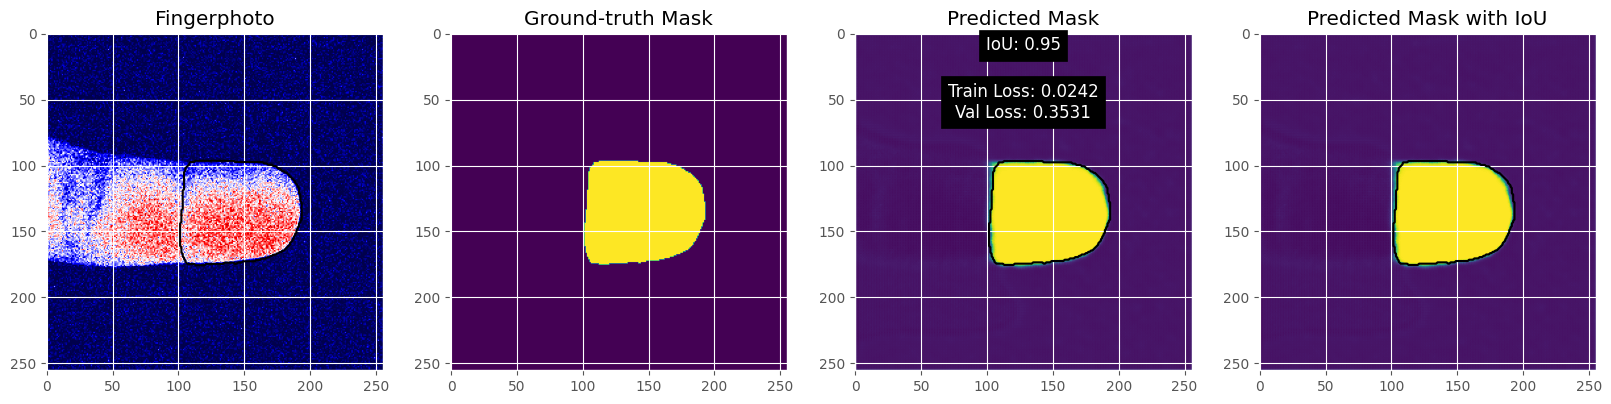

In [54]:
i=15
plot_sample(X_valid, y_valid, preds_val, preds_val_t, ix=i,train_loss=results.history["loss"][i], val_loss=results.history["val_loss"][i])

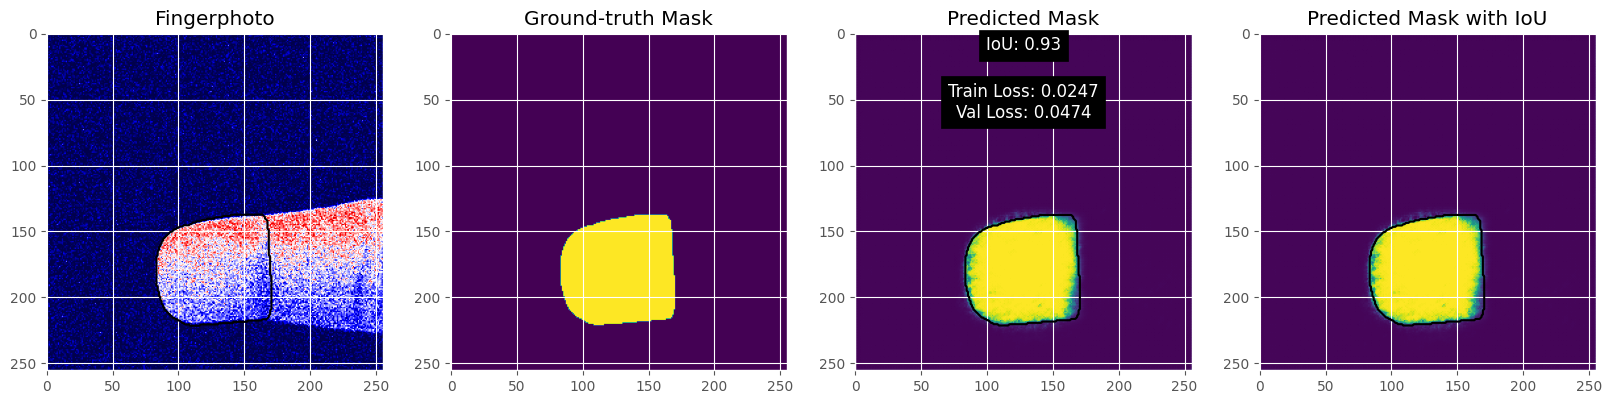

In [46]:
i=45
plot_sample(X_valid, y_valid, preds_val, preds_val_t, ix=i,train_loss=results.history["loss"][i], val_loss=results.history["val_loss"][i])

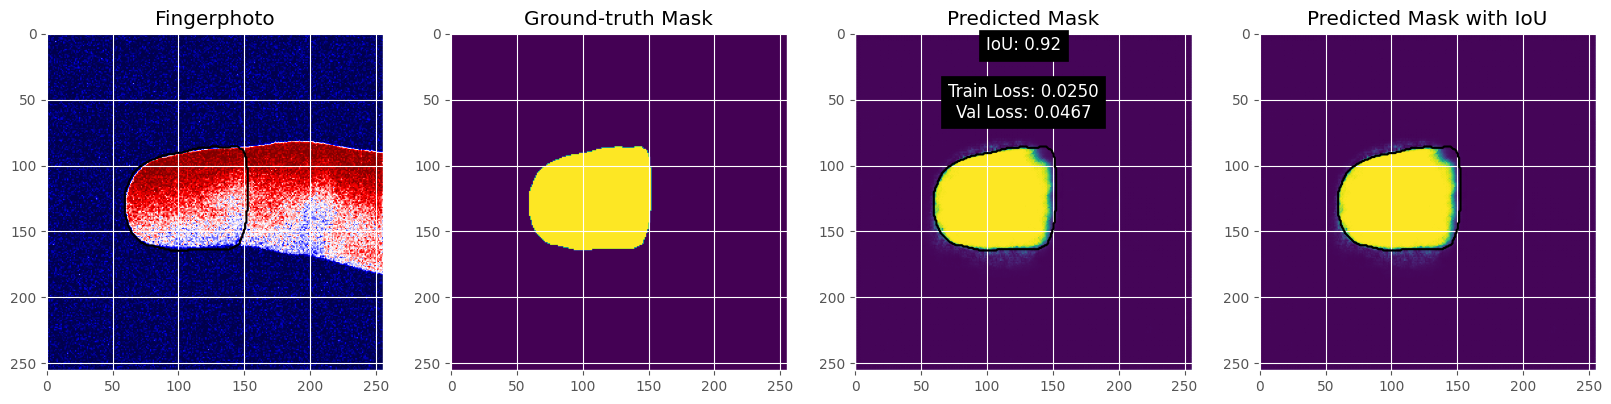

In [47]:
i=35
plot_sample(X_valid, y_valid, preds_val, preds_val_t, ix=i,train_loss=results.history["loss"][i], val_loss=results.history["val_loss"][i])